# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Parte 3: Regresión

__Número de grupo: 1__

__Nombres de los estudiantes: María Arranz y Celia Rubio__

En este notebook trabajaremos con una colección de datos de alquileres de Airbnb en Amsterdam. El objetivo de este problema es entrenar una red neuronal capaz de predecir el precio del alojamiento a partir de un conjunto de características.

## 1) Descripción de los datos

Carga el fichero de datos `airbnb.csv` en un dataframe. Describe el conjunto de datos y trata de interpretar el significado de cada una de las variables. Estudia la distribución de precios.

In [1]:
import pandas as pd
filename = './airbnb.csv'
df = pd.read_csv(filename)
df.describe()

,accommodates,bathrooms,bedrooms,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,distance_centre,instant_bookable,entire_home,private_room,shared_room,price
count,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000
mean,2.880317,1.116215,1.390919,1.499333,3.372316,52.365312,4.889033,2.885051,17.797440,2.998582,0.155954,0.777170,0.218562,0.004267,130.050273
std,1.298492,0.343442,0.839649,0.940643,11.203593,0.015765,0.035010,7.252271,34.766613,1.610995,0.362824,0.416159,0.413285,0.065187,63.820328
min,1.000000,0.000000,0.000000,1.000000,0.000000,52.290308,4.753513,1.000000,0.000000,0.115801,0.000000,0.000000,0.000000,0.000000,19.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,52.355582,4.864839,2.000000,2.000000,1.948924,0.000000,1.000000,0.000000,0.000000,89.000000
50%,2.000000,1.000000,1.000000,1.000000,1.000000,52.364960,4.886370,2.000000,7.000000,2.841338,0.000000,1.000000,0.000000,0.000000,115.000000
75%,4.000000,1.000000,2.000000,2.000000,1.000000,52.374805,4.907953,3.000000,18.000000,3.577086,0.000000,1.000000,0.000000,0.000000,150.000000
max,17.000000,8.000000,10.000000,16.000000,106.000000,52.426224,5.027689,523.000000,496.000000,11.842162,1.000000,1.000000,1.000000,1.000000,440.000000


El conjunto de datos está constituido por 14998 alojamientos de los que se dispone de las siguientes métricas:


- accommodates : el número de huéspedes que puede alojar la propiedad
- bathrooms : número de baños
- bedrooms : número de dormitorios
- guests_included : número de reservas distintas que puede alojar en un mismo momento
- host_listings_count : número de alojamientos que tiene el propietario en la plataforma 
- latitude : latitud (ubicación)
- longitude : longitud (ubicación)
- minimum_nights : mínimo número de noches que se pueden reservar
- number_of_reviews : número de valoraciones
- distance_centre : distancia al centro de la ciudad
- instant_bookable : posibilidad de reserva instantánea
- entire_home : el alojamiento constituye la totalidad de la casa
- private_room : el alojamiento es en una habitación privada
- shared_room : el alojamiento es en una habitación compartida
- price : precio por noche

In [2]:
df['price'].describe()

count    14998.000000
mean       130.050273
std         63.820328
min         19.000000
25%         89.000000
50%        115.000000
75%        150.000000
max        440.000000
Name: price, dtype: float64

<AxesSubplot:ylabel='Density'>

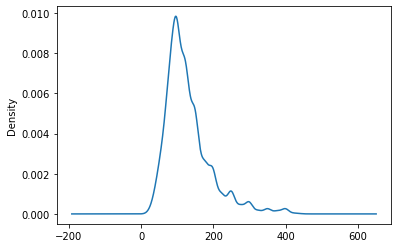

In [3]:
# Distribución de precios
df['price'].plot.density()

<AxesSubplot:>

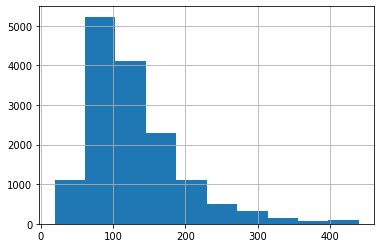

In [4]:
df['price'].hist()

#### Se observa que la mayoría de los alojamientos se concentran en torno a los 100 euros por noche y el número de alojamientos con un precio mayor va disminuyendo rapidamente. El 75% de los alojamientos tienen un precio menor o igual que 150 euros, mucho más cerca de el precio medio (130) que del máximo (440).

## 2) Selección de variables

Calcula los coeficientes de correlación de Pearson entre la variable de salida y el resto de variables. Crea un nuevo dataframe que contenga el precio y, además, las variables que estén relacionadas con él por un valor de correlacción de al menos 0.2 (de forma directa o inversa).

In [5]:
#calcular coefs correlacion de Pearson entre price y resto de varibles
df.corr(method='pearson')['price']

accommodates           0.552183
bathrooms              0.283759
bedrooms               0.517237
guests_included        0.338739
host_listings_count    0.109141
latitude               0.027922
longitude              0.035887
minimum_nights         0.007708
number_of_reviews     -0.088437
distance_centre       -0.204698
instant_bookable      -0.004410
entire_home            0.361313
private_room          -0.357184
shared_room           -0.042109
price                  1.000000
Name: price, dtype: float64

##### Por lo tanto incluimos: accomodates, bathrooms, bedrooms, guests_included, distance_centre, entire_home, private_room en el nuevo dataframe

In [6]:
variables = ['price','accommodates','bathrooms','bedrooms','guests_included','distance_centre','entire_home','private_room']
df2 = df.loc[:,variables]
df2.describe()

,price,accommodates,bathrooms,bedrooms,guests_included,distance_centre,entire_home,private_room
count,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000
mean,130.050273,2.880317,1.116215,1.390919,1.499333,2.998582,0.777170,0.218562
std,63.820328,1.298492,0.343442,0.839649,0.940643,1.610995,0.416159,0.413285
min,19.000000,1.000000,0.000000,0.000000,1.000000,0.115801,0.000000,0.000000
25%,89.000000,2.000000,1.000000,1.000000,1.000000,1.948924,1.000000,0.000000
50%,115.000000,2.000000,1.000000,1.000000,1.000000,2.841338,1.000000,0.000000
75%,150.000000,4.000000,1.000000,2.000000,2.000000,3.577086,1.000000,0.000000
max,440.000000,17.000000,8.000000,10.000000,16.000000,11.842162,1.000000,1.000000


## 3) Normalización

Decide si debes o no normalizar los datos. En caso afirmativo elige razonadamente entre escalarlos o estandarizarlos.

Si decides escalar los datos deberás crear dos `scalers` distintos, uno para el array con la descripción de los pisos y otro para el array con el precio. Lo hacemos de este modo porque así podremos desescalar las predicciones más fácilmente.

#### Es adecuado reescalar los datos ya que son muy heterogeneos en la escalas en las que se miden. Por ejemplo, el precio tiene una media de 130 euros, mientras private_home es binaria.

In [7]:
from sklearn.preprocessing import MinMaxScaler
scalerDesc = MinMaxScaler()
scalerPrice = MinMaxScaler()
dfDesc = df2.loc[:,['accommodates','bathrooms','bedrooms','guests_included','distance_centre','entire_home','private_room']]
dfPrice = df2.loc[:,['price']]
scalerDesc.fit(dfDesc.values)
desc_scaled = scalerDesc.transform(dfDesc.values)
scalerPrice.fit(dfPrice.values.reshape(-1, 1))
price_scaled = scalerPrice.transform(dfPrice.values.reshape(-1, 1))

## 4) Entrenamiento y selección

Crea dos redes neuronales de tipo Perceptrón Multicapa:
- La primera con una capa oculta de 200 neuronas
- La segunda con dos capas ocultas cada una de 100 neuronas

Pinta la curva de aprendizaje para cada red variando el parámetro `alpha` que controla el coeficiente de regularización L2 y determina el valor óptimo usando validación cruzada. Asegúrate de que no salen warnings indicando que no se ha alcanzado la convergencia durante el entrenamiento (basta con poner un número de max_iter suficientemente grande).

¿Alguna de las dos redes domina a la otra? ¿Por qué crees que se producen las diferencias?

In [8]:
RANDOM_STATE=333

In [9]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

cv_scores_mean1=[]
cv_scores_std1=[]

# Entrenar y validar distintas configuraciones
regul_param_range = 10.0 ** -np.arange(1, 10) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(200, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, desc_scaled, price_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean1.append(scores.mean())
    cv_scores_std1.append(scores.std())

cv_scores_mean1, cv_scores_std1

([-0.012678058326870712,
  -0.012226656573093372,
  -0.012274867316486719,
  -0.012250040777821141,
  -0.012243364484804887,
  -0.012228302978063621,
  -0.012233977052536886,
  -0.012231951114801038,
  -0.01224752961346284],
 [0.00039664192090939956,
  0.0002739886670630574,
  0.00020223707355082875,
  0.00020722075014518768,
  0.0002049348239465796,
  0.00021794733926554057,
  0.00020729995733009357,
  0.00020897420044105295,
  0.000205468916631938])

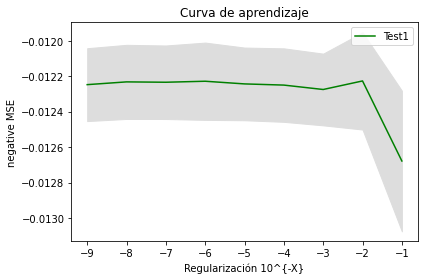

In [10]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean1, color="g", label="Test1")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean1) - np.array(cv_scores_std1)
upper_limit = np.array(cv_scores_mean1) + np.array(cv_scores_std1)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [11]:
cv_scores_mean2=[]
cv_scores_std2=[]

for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(100,100), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, desc_scaled, price_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean2.append(scores.mean())
    cv_scores_std2.append(scores.std())

cv_scores_mean2, cv_scores_std2

([-0.012723697054611308,
  -0.011979667476459645,
  -0.011740184971338063,
  -0.011704574246138705,
  -0.011694373017149111,
  -0.01175465244045318,
  -0.0117560523881583,
  -0.011737572944894536,
  -0.011744357097901465],
 [0.0003885895981672945,
  0.0003546605235645444,
  0.0004269019094578842,
  0.0004430868314513379,
  0.0004360268404662567,
  0.00045943793468267093,
  0.0004737152604121641,
  0.00046431412446062606,
  0.0004591725044893365])

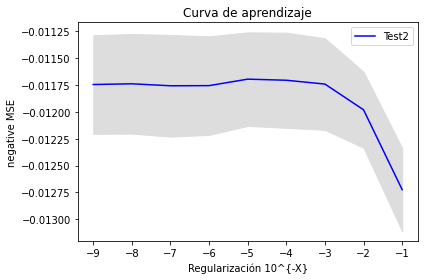

In [12]:
# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean2, color="b", label="Test2")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean2) - np.array(cv_scores_std2)
upper_limit = np.array(cv_scores_mean2) + np.array(cv_scores_std2)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

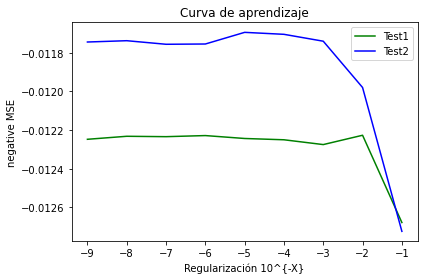

In [13]:
plt.plot(np.log10(regul_param_range), cv_scores_mean1, color="g", label="Test1")
plt.plot(np.log10(regul_param_range), cv_scores_mean2, color="b", label="Test2")
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

#### La segunda red  domina a la primera (el error se mantiene menor para la totalidad de parámetros de regulación). Además, el valor óptimo (el más cercano a cero)  parece ser  $\alpha=10^{-5}$. Es probable que sea porque 

## 5) Medición del error

Elige la mejor configuración del apartado anterior y usa la función `cross_val_predict` para realizar una predicción del valor de todos los establecimientos usando validación cruzada. ¿Cuál es el error medio del modelo en euros? ¿Crees que el modelo es suficientemente bueno?

Pinta la distribución del error en euros y el diagrama de dispersión de la predicción frente al valor real. ¿El modelo comete los mismos tipos de errores en establecimientos de distintos precios? ¿Por qué crees que se producen esos errores?

In [29]:
from sklearn.model_selection import cross_val_predict

# Creamos el clasificador
mlp = MLPRegressor(hidden_layer_sizes=(100,100), activation='relu', solver='adam', alpha=10.0 ** (-5), batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=333)
    
# estimamos 
predicts_scaled = cross_val_predict(mlp, desc_scaled, price_scaled.ravel(), cv=10)

# desescalamos las predicciones para que estén en la escala original
predicts=scalerPrice.inverse_transform(predicts_scaled.reshape(1, -1))

In [47]:
errors = np.abs(dfPrice.values.ravel()- predicts.ravel()) # error en cada ejemplo
mean_error = np.mean(errors) 
std_error = np.std(errors)
mean_price = np.mean(df['price'])
error_squared = list(map(lambda num: num ** 2, errors))
rmse = np.sqrt(sum(error_squared) / len (error_squared))

print('Error medio (€):', mean_error)
print('Desviación típica (€):', std_error)
print('Error medio en %:', mean_error/mean_price*100)
print('RMSE (€)', rmse)

Error medio (€): 31.99620306888545
Desviación típica (€): 32.5780410688307
Error medio en %: 24.60294949008528
RMSE (€) 45.66273941309007


#### El error medio es de casi 32€, siendo este en porcentaje un 24.6% con respecto al precio medio. Esto nos indica que las predicciones no son muy buenas ya que pueden llegar a distar bastante del precio real.

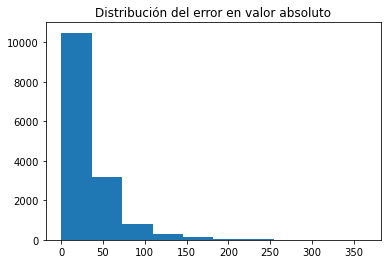

In [44]:
# Dibujamos el histograma de los errores
fig1 = plt.figure()
ax1 = plt.axes()
ax1.hist(errors)

plt.title('Distribución del error en valor absoluto')
plt.show()

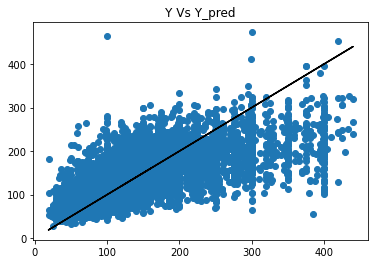

In [49]:
fig2 = plt.figure()
ax2 = plt.axes()

# dibujamos los errores: la distancia a la recta indica el nivel de error
ax2.scatter(dfPrice.values.ravel(), predicts.ravel()) 
# Pintamos la referencia de la predicción perfecta
ax2.plot(dfPrice.values.ravel(), dfPrice.values.ravel(), color='k') 

plt.title('Y Vs Y_pred')
plt.show()

#### Se observa que en la mayoría de los casos el error es menor a 50 € y por lo tanto podría llegar a ser asumible pero el modelo falla en predecir el precio de las viviendas en la franja de precios superior. Esto puede ser debido a un menor número de ejemplares en el conjunto de entrenamiento en ese intervalo.